# COGS 108 - Do South California Drivers Drive Worse in the Rain than North California Drivers?

# Overview

The focus of this project is to find if Southern California drivers crash more often in the rain than Northern California drivers. From the results of our analysis, we would be able to conclude that Southern California drivers handle rainy days worse than Northern California. Our first findings showed that raining car crashes in both the Northern and Southern cities occur significantly less than collisions on dry days due to the decrease of traffic during storms. Taking the averages of rain crashes/rainy days versus dry crashes/dry days, the San Diego average denoted that drivers crash much less in the rain. Lastly, we compared the annual crash totals aligned with the amount of precipitation that year, hoping to see that more rain correlated to more collisions. The linear regressions showed a clear positive correlation for Sacramento and San Francisco. However, there was a negative correlation for San Diego and a small positive slope for Los Angeles, meaning rain was not a clear factor for the collisions. Our group then came to the conclusion that Southern California drivers may actually drive better in the rain than Northern California drivers. 

# Names

- Aditya Ashar
- Alanna Merlan
- Andy Sunjic
- Emma Thomsen
- Sujay Srinivasan

<a id='research_question'></a>
# Research Question

Do drivers in Southern California have a greater increase in vehicle collisions during rainy weather when compared to drivers in Northern California?

<a id='background'></a>

## Background & Prior Work

   While no one likes driving in a thunderstorm, San Diego drivers are notorious for seeming to forget how to drive the second a drop of rain hits the asphalt. San Diego’s own Union-Tribune has published several articles with elementary tips on driving in rain to help San Diegans navigate its slippery streets (4). The correlation between rain and car accidents has been previously established, with an estimated 34% increase in collisions during rain (1). As none of us are native to San Diego, we have anecdotally witnessed an alarming amount of slothlike traffic and rampant onramp fender benders during rare rainy days here, and were curious as to whether or not San Diego’s typically sunny weather really produces more bad drivers in the rain. In order to test out this stereotype, we will be examining collision and weather data from four major California cities: San Diego, Los Angeles, Sacramento, and San Francisco. 

   To better inform a hypothesis, we compared average annual precipitation for each of our cities and found that San Diego receives the least rain with an annual average of 10.43 inches of rainfall, followed by Los Angeles at 14.93”, and with Sacramento and San Francisco roughly equal at 18.52” and 20.68” respectively (3). Since the northern cities get nearly twice the precipitation of San Diego, we theorized that drivers in these cities would be more experienced at driving in the rain, and would therefore have less of an increase in crashes during rain. We also found widespread media coverage of the terrible reputation of California drivers, with all four of our study cities earning spots in the top 25 of a 2019 study on the worst drivers in the United States. Sacramento ranked highest at a prestigious 5th place (5). Our project seeks to determine if Californians are simply consistently awful at operating automobiles, or if San Diego is uniquely ill-prepared for inclement weather.

# References:

1) Washington Post: [Study: Rain and snow increase risk of fatal car crashes by 34 percent](https://www.washingtonpost.com/weather/2019/04/24/study-rain-increases-risk-fatal-car-crashes-by-percent/)

2) Times of San Diego: [California Drivers Ranked The Worst in the United States in Annual Study](https://timesofsandiego.com/life/2017/12/14/california-drivers-ranked-the-worst-in-the-united-states-in-annual-study/)

3) Western Regional Climate Center: [Cooperative Climatological Data Summaries](https://wrcc.dri.edu/Climate/west_coop_summaries.php)

4) San Diego Union Tribune: [Why San Diegans can't drive in the rain](https://www.sandiegouniontribune.com/sdut-san-diego-rain-driving-tips-2016jan08-story.html)

5) ABC10: [Sacramento ranks fifth in worst drivers in America](https://www.abc10.com/article/news/local/sacramento/sacramento-fifth-in-worst-drivers-in-america/103-cb273291-0e2e-4d51-a1ed-4438df4b4c9d)

# Hypothesis


Because cities in Southern California receive less rainfall than cities in Northern California, drivers in Southern California cities are on average less experienced at driving in hazardous weather conditions, resulting in a greater increase in collision rates during rain compared to Northern Californians.

# Datasets

____________________________________________________________________________________________
Name: RainCrashData Repository

Link: https://github.com/EmThomsen/RainCrashData

Description: All datasets for our project are hosted in a public repository for accessibility.
____________________________________________________________________________________________
Name: NOAA (National Oceanic and Atmospheric Administration)

Link: https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND

Description: The NOAA provides historical and real-time data from weather stations across the country to the public and allows users to download custom reports. We assembled a dataset of daily precipitation across 5 years, from 2015 through 2019. These are from centrally located weather stations in each of our study cities. The resulting dataset contains 29,216 unique observations.
____________________________________________________________________________________________
Name: SWITRS (The Statewide Integrated Traffic Records System)

Link: https://iswitrs.chp.ca.gov/Reports/jsp/CollisionReports.jsp

Description: SWITRS is a publicly available database managed by the state of California that aggregates collision reports from local police departments, sheriff’s departments, and the California Highway Patrol. These reports include data on location, severity, time, and conditions of each incident. We utilized SWITRS to pull reports for each of our study cities for the years 2015-2019, as 2020 data is not yet available. Before cleaning, our 2019 dataset had 3.7 million observations. The cleaned 2019 dataset contains 302,970 observations, with similar numbers expected for each of the other study years. 
____________________________________________________________________________________________
We will use pandas for each city to concatenate each annual dataset into one larger 5-year dataframe per city. The analyses of our study cities, along with the summed weather data, will be combined into a concise final dataframe to facilitate visualizations. 
____________________________________________________________________________________________

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in .txt files from github
la15df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/LosAngelesData/LA2015.txt')
la16df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/LosAngelesData/LA2016.txt')
la17df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/LosAngelesData/LA2017.txt')
la18df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/LosAngelesData/LA2018.txt')
la19df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/LosAngelesData/LA2019.txt')

In [3]:
sd15df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanDiegoData/SD2015.txt')
sd16df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanDiegoData/SD2016.txt')
sd17df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanDiegoData/SD2017.txt')
sd18df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanDiegoData/SD2018.txt')
sd19df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanDiegoData/SD2019.txt')

In [4]:
sac15df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SacramentoData/Sac2015.txt')
sac16df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SacramentoData/Sac2016.txt')
sac17df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SacramentoData/Sac2017.txt')
sac18df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SacramentoData/Sac2018.txt')
sac19df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SacramentoData/Sac2019.txt')

In [5]:
sf15df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanFranciscoData/SF2015.txt')
sf16df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanFranciscoData/SF2016.txt')
sf17df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanFranciscoData/SF2017.txt')
sf18df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanFranciscoData/SF2018.txt')
sf19df=pd.read_csv('https://raw.githubusercontent.com/EmThomsen/RainCrashData/main/SanFranciscoData/SF2019.txt')

# Data Cleaning

In [6]:
# Combining the crash dataframes into one per city
# Los Angeles
laList    = [la15df, la16df, la17df, la18df, la19df]
laCrashDf = pd.concat(laList)
# San Diego
sdList    = [sd15df, sd16df, sd17df, sd18df, sd19df]
sdCrashDf = pd.concat(sdList)
# Sacramento
sacList   = [sac15df, sac16df, sac17df, sac18df, sac19df]
scCrashDf = pd.concat(sacList)
# San Francisco
sfList    = [sf15df, sf16df, sf17df, sf18df, sf19df]
sfCrashDf = pd.concat(sfList)

In [7]:
# Keeping only these columns: COLLISION_DATE, WEATHER_1
# Changing names to COLLISION_DATE ->  DATE, WEATHER_1 -> WEATHER
# Setting the format of the dates to the default datetime format
# Sorting dates into chronological order
# Assigning proper labels to WEATHER and ROAD_SURFACE values
def clean_city(city):

    city = city[['COLLISION_DATE', 'WEATHER_1']]
    city['COLLISION_DATE'] = pd.to_datetime(city['COLLISION_DATE'], format='%Y%m%d')
    city = city.sort_values('COLLISION_DATE').reset_index(drop=True)
    city = city.rename(columns={'COLLISION_DATE': 'DATE', 'WEATHER_1': 'WEATHER'})
    city['WEATHER'] = city['WEATHER'].replace({'A': 'Clear', 'B': 'Cloudy', 'C': 'Rain', 'D': 'Snowing', 'E': 'Fog', 'F': 'Other', 'G': 'Wind'})
    
    return city



laCrashDf = clean_city(laCrashDf)
sdCrashDf = clean_city(sdCrashDf)
scCrashDf = clean_city(scCrashDf)
sfCrashDf = clean_city(sfCrashDf)

In [8]:
# We notice that dates will be repeated because there's more than one collision happening in a day
# We want to get rid of this repetitive data by adding in a Collision_Count column, where it will give 
# the amount of collisions that occured that day.
laCrashDf['COLLISION_COUNT'] = 1
sdCrashDf['COLLISION_COUNT'] = 1
scCrashDf['COLLISION_COUNT'] = 1
sfCrashDf['COLLISION_COUNT'] = 1
# Let's see what it looks like
laCrashDf

,DATE,WEATHER,COLLISION_COUNT
0,2015-01-01,Clear,1
1,2015-01-01,Clear,1
2,2015-01-01,Clear,1
3,2015-01-01,Clear,1
4,2015-01-01,Clear,1
...,...,...,...
191325,2019-12-31,Clear,1
191326,2019-12-31,Clear,1
191327,2019-12-31,Clear,1
191328,2019-12-31,Clear,1


In [9]:
# Combine rows according to date, while taking the sum of the collision count
def group_city(city):
    aggregation_functions = {'WEATHER': 'first', 'COLLISION_COUNT': 'sum'}
    city = city.groupby(city['DATE']).aggregate(aggregation_functions).reset_index()
    
    return city


laCrashDf = group_city(laCrashDf)
sdCrashDf = group_city(sdCrashDf)
scCrashDf = group_city(scCrashDf)
sfCrashDf = group_city(sfCrashDf)

In [10]:
# We can now see that there is only one row per date, with the sum of all collisions that occured that day
#This also put the dates in chronological order!
sfCrashDf

,DATE,WEATHER,COLLISION_COUNT
0,2015-01-01,Clear,13
1,2015-01-02,Clear,12
2,2015-01-03,Clear,11
3,2015-01-04,Clear,6
4,2015-01-05,Clear,17
...,...,...,...
1821,2019-12-27,Clear,12
1822,2019-12-28,Clear,18
1823,2019-12-29,Rain,10
1824,2019-12-30,Clear,11


WEATHER DATA - Manipulating the weather data before merging it with the crash data

In [11]:
# Working with precipitation data from 4 different cities, from SD, LA, SF, AND SAC, already includes years 2015-2019
weather=pd.read_csv('https://raw.githubusercontent.com/COGS108/group080_wi21/main/weather_data/weather.csv?token=ARKENKMWKQRLHUDXYBYL653ALBHII')

In [12]:
# Look at first few rows and last few rows of the set and observe it
weather.head()

,STATION,NAME,DATE,PRCP,SNOW
0,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1/1/15,0.0,NaN
1,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1/2/15,0.0,NaN
2,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1/3/15,0.0,NaN
3,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1/4/15,0.0,NaN
4,USW00023232,"SACRAMENTO AIRPORT ASOS, CA US",1/5/15,0.0,NaN


In [13]:
weather.tail()

,STATION,NAME,DATE,PRCP,SNOW
7298,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",12/27/19,0.0,NaN
7299,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",12/28/19,0.0,NaN
7300,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",12/29/19,0.0,NaN
7301,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",12/30/19,0.0,NaN
7302,USW00023188,"SAN DIEGO INTERNATIONAL AIRPORT, CA US",12/31/19,0.0,NaN


In [14]:
# Describe the set and observe it
weather.describe()

,PRCP,SNOW
count,7303.000000,0.0
mean,0.044133,NaN
std,0.193121,NaN
min,0.000000,NaN
25%,0.000000,NaN
50%,0.000000,NaN
75%,0.000000,NaN
max,3.150000,NaN


In [15]:
# Remove station and snow columns
weather = weather.drop(columns=['STATION', 'SNOW'])
# Rename 'NAME' column to 'CITY'
# Rename 'PRCP' column to 'PRCP(in)'
weather = weather.rename({'NAME': 'CITY', 'PRCP': 'PRCP_in'}, axis='columns')
# Rename locations to just say the city
weather = weather.replace(['SACRAMENTO AIRPORT ASOS, CA US', 'SAN DIEGO INTERNATIONAL AIRPORT, CA US', 'SAN FRANCISCO DOWNTOWN, CA US', 'LOS ANGELES DOWNTOWN USC, CA US'], ['SAC', 'SD', 'SF', 'LA'])

# Look at it now
weather.head()

,CITY,DATE,PRCP_in
0,SAC,1/1/15,0.0
1,SAC,1/2/15,0.0
2,SAC,1/3/15,0.0
3,SAC,1/4/15,0.0
4,SAC,1/5/15,0.0


In [16]:
# Changing date to default datetime format
weather['DATE'] = pd.to_datetime(weather['DATE'], dayfirst=True)
weather.head()

,CITY,DATE,PRCP_in
0,SAC,2015-01-01,0.0
1,SAC,2015-02-01,0.0
2,SAC,2015-03-01,0.0
3,SAC,2015-04-01,0.0
4,SAC,2015-05-01,0.0


In [17]:
# Splitting up the weather dataset into 4 separate dfs by city
laweather=weather.loc[weather['CITY'] == 'LA']
sdweather=weather.loc[weather['CITY'] == 'SD']
scweather=weather.loc[weather['CITY'] == 'SAC']
sfweather=weather.loc[weather['CITY'] == 'SF']

sfweather

,CITY,DATE,PRCP_in
1826,SF,2015-01-01,0.00
1827,SF,2015-02-01,0.00
1828,SF,2015-03-01,0.00
1829,SF,2015-04-01,0.00
1830,SF,2015-05-01,0.00
...,...,...,...
3646,SF,2019-12-27,0.00
3647,SF,2019-12-28,0.00
3648,SF,2019-12-29,0.51
3649,SF,2019-12-30,0.01


In [18]:
# Now merging each city's weather data with the collision data, using the date as the intersection/on
ladf = laweather.merge(laCrashDf, on='DATE')
sddf = sdweather.merge(sdCrashDf, on='DATE')
scdf = scweather.merge(scCrashDf, on='DATE')
sfdf = sfweather.merge(sfCrashDf, on='DATE')
ladf

,CITY,DATE,PRCP_in,WEATHER,COLLISION_COUNT
0,LA,2015-01-01,0.0,Clear,98
1,LA,2015-02-01,0.0,Clear,89
2,LA,2015-03-01,0.0,Rain,109
3,LA,2015-04-01,0.0,Clear,117
4,LA,2015-05-01,0.0,Clear,110
...,...,...,...,...,...
1821,LA,2019-12-27,0.0,Clear,79
1822,LA,2019-12-28,0.0,Cloudy,62
1823,LA,2019-12-29,0.0,Clear,87
1824,LA,2019-12-30,0.0,Clear,74


In [19]:
# Lastly, combine all 4 cities into one dataframe for EDA
fullList = [ladf, sddf, scdf,  sfdf]
weatherCrashDf = pd.concat(fullList)
weatherCrashDf

,CITY,DATE,PRCP_in,WEATHER,COLLISION_COUNT
0,LA,2015-01-01,0.00,Clear,98
1,LA,2015-02-01,0.00,Clear,89
2,LA,2015-03-01,0.00,Rain,109
3,LA,2015-04-01,0.00,Clear,117
4,LA,2015-05-01,0.00,Clear,110
...,...,...,...,...,...
1820,SF,2019-12-27,0.00,Clear,12
1821,SF,2019-12-28,0.00,Clear,18
1822,SF,2019-12-29,0.51,Rain,10
1823,SF,2019-12-30,0.01,Clear,11


# Data Analysis & Results (EDA)

In [20]:
# Let's look at the statistics of our precipitation and collision count columns
weatherCrashDf.describe()

,PRCP_in,COLLISION_COUNT
count,7302.000000,7302.000000
mean,0.044139,34.661052
std,0.193134,41.292941
min,0.000000,1.000000
25%,0.000000,9.000000
50%,0.000000,13.000000
75%,0.000000,47.750000
max,3.150000,161.000000


In [21]:
# We really only care about the days where the weather was either clear, cloudy, or raining
# Including cloudy because cities have a great number of crashes on a dry, cloudy day, so we don't want to omit it
weatherCrashDf = weatherCrashDf[(weatherCrashDf['WEATHER'] == 'Clear') | (weatherCrashDf['WEATHER'] == 'Cloudy') | (weatherCrashDf['WEATHER'] == 'Rain')]

weatherCrashDf

,CITY,DATE,PRCP_in,WEATHER,COLLISION_COUNT
0,LA,2015-01-01,0.00,Clear,98
1,LA,2015-02-01,0.00,Clear,89
2,LA,2015-03-01,0.00,Rain,109
3,LA,2015-04-01,0.00,Clear,117
4,LA,2015-05-01,0.00,Clear,110
...,...,...,...,...,...
1820,SF,2019-12-27,0.00,Clear,12
1821,SF,2019-12-28,0.00,Clear,18
1822,SF,2019-12-29,0.51,Rain,10
1823,SF,2019-12-30,0.01,Clear,11


Since our claim is that the Northern Cities drive better in the rain because they are more experienced with rainy days, we want to show that rain occurs more in Sacramento and San Francisco than Los Angeles and San Diego.

In [22]:
# Look at the amount of clear vs cloudy vs raining days for each city
laWeather_counts = weatherCrashDf[weatherCrashDf['CITY'] == 'LA']['WEATHER'].value_counts()
laWeather_counts

Clear     1629
Cloudy     137
Rain        50
Name: WEATHER, dtype: int64

In [23]:
sdWeather_counts = weatherCrashDf[weatherCrashDf['CITY'] == 'SD']['WEATHER'].value_counts()
sdWeather_counts

Clear     1493
Cloudy     259
Rain        35
Name: WEATHER, dtype: int64

In [24]:
scWeather_counts = weatherCrashDf[weatherCrashDf['CITY'] == 'SAC']['WEATHER'].value_counts()
scWeather_counts

Clear     1568
Cloudy     151
Rain        82
Name: WEATHER, dtype: int64

In [25]:
sfWeather_counts = weatherCrashDf[weatherCrashDf['CITY'] == 'SF']['WEATHER'].value_counts()
sfWeather_counts

Clear     1492
Cloudy     181
Rain       105
Name: WEATHER, dtype: int64

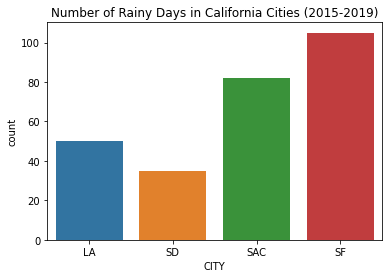

In [26]:
# Visualizing the amount of rainy days in each city
# Looking to prove that the Northern cities have more rain that the South

sns.countplot(x='CITY', data=weatherCrashDf[weatherCrashDf['WEATHER'] == 'Rain']).set_title('Number of Rainy Days in California Cities (2015-2019)');

f2 = plt.gcf()

Validating our assumption, there are far more rainy days in the Northern cities versus the Southern cities, about twice as much. We can also see from that value counts that San Diego actually has the most cloudy days, even more than San Francisco. Since we are only considering the increase of crashes on raining days, we will consider clear and cloudy days as normal dry/non-raining days so that we could compare it to the raining days. Therefore, let's change 'clear' and 'cloudy' to 'Dry'.

In [27]:
weatherCrashDf['WEATHER'] = weatherCrashDf['WEATHER'].replace({'Clear': 'Dry', 'Cloudy': 'Dry'})

In [28]:
weatherCrashDf['WEATHER'].value_counts()

Dry     6910
Rain     272
Name: WEATHER, dtype: int64

Now that we have determined there are more raining days in the Northern cities vs the South, we must now create visuals to compare the amount of crashes on dry vs rainy days. We will approach this using histograms.

# Los Angeles

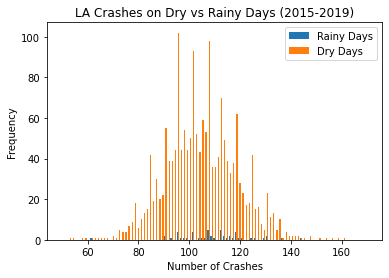

In [29]:
ladf          = weatherCrashDf.loc[weatherCrashDf['CITY'] == 'LA']
laDryCrashes  = ladf.loc[ladf['WEATHER'] == 'Dry']
laRainCrashes = ladf.loc[ladf['WEATHER'] == 'Rain']

# Rain and dry day distributions
bins = np.linspace(50, 170, 100)

plt.hist([laRainCrashes['COLLISION_COUNT'],laDryCrashes['COLLISION_COUNT']], bins, label=['Rainy Days', 'Dry Days'])
plt.legend(loc='upper right')
plt.title("LA Crashes on Dry vs Rainy Days (2015-2019)")
plt.xlabel("Number of Crashes")
plt.ylabel("Frequency")
plt.show()

# San Diego

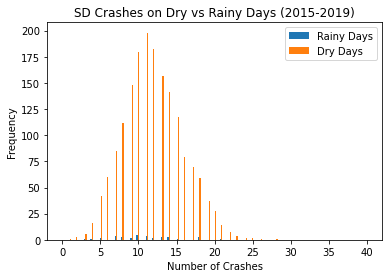

In [30]:
sddf          = weatherCrashDf.loc[weatherCrashDf['CITY'] == 'SD']
sdDryCrashes  = sddf.loc[sddf['WEATHER'] == 'Dry']
sdRainCrashes = sddf.loc[sddf['WEATHER'] == 'Rain']

# Rain and dry day distributions 
bins = np.linspace(0, 40, 100)

plt.hist([sdRainCrashes['COLLISION_COUNT'], sdDryCrashes['COLLISION_COUNT']], bins, label=['Rainy Days', 'Dry Days'])
plt.legend(loc='upper right')
plt.title("SD Crashes on Dry vs Rainy Days (2015-2019)")
plt.xlabel("Number of Crashes")
plt.ylabel("Frequency")
plt.show()

# Sacramento

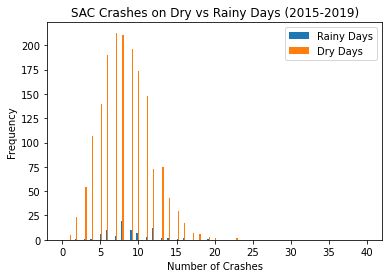

In [31]:
scdf          = weatherCrashDf.loc[weatherCrashDf['CITY'] == 'SAC']
scDryCrashes  = scdf.loc[scdf['WEATHER'] == 'Dry']
scRainCrashes = scdf.loc[scdf['WEATHER'] == 'Rain']

# Rain and dry day distributions
bins = np.linspace(0, 40, 100)

plt.hist([scRainCrashes['COLLISION_COUNT'], scDryCrashes['COLLISION_COUNT']], bins, label=['Rainy Days', 'Dry Days'])
plt.legend(loc='upper right')
plt.title("SAC Crashes on Dry vs Rainy Days (2015-2019)")
plt.xlabel("Number of Crashes")
plt.ylabel("Frequency")
plt.show()

# San Francisco

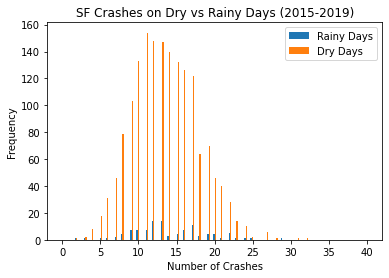

In [32]:
sfdf          = weatherCrashDf.loc[weatherCrashDf['CITY'] == 'SF']
sfDryCrashes  = sfdf.loc[sfdf['WEATHER'] == 'Dry']
sfRainCrashes = sfdf.loc[sfdf['WEATHER'] == 'Rain']

# Rain and dry day distributions
bins = np.linspace(0, 40, 100)

plt.hist([sfRainCrashes['COLLISION_COUNT'], sfDryCrashes['COLLISION_COUNT']], bins, label=['Rainy Days', 'Dry Days'])
plt.legend(loc='upper right')
plt.title("SF Crashes on Dry vs Rainy Days (2015-2019)")
plt.xlabel("Number of Crashes")
plt.ylabel("Frequency")
plt.show()

--------------------------------------------------------------------------------------------

## Major Turning Point In Our EDA

As we can see in the histograms, the blue is faintly seen among the orange. There is a significantly more dry days than raining days, which was to be expected. However, assuming that more crashes would occur in the rain, we should have seen the blue further to the right of the x-axis, denoting a higher daily crash rate. We can see that for every city, the blue daily totals are still within the same domain as the orange. We then had the realization why this approach to our comparison is faulty - **we did not consider the fact that there are far less cars on the road when it is raining.** Unless the traffic amount were the same throughout all types of weather, we would not be able to continue this approach. 

**PLAN B - Pulling Traffic Data**

The group then decided to see if we could insert additional dataframes accounting for the Annual Average Daily Traffic (called AADT datasets) in order to take the amount of crashes over the amount of traffic that day. However, these datasets were very diffuclt to pull since they were specific to each highway and street, and did not contain dates. This Plan B proved to be too much searching and wrangling, and therefore the group decided on Plan C.

**PLAN C - Comparing the average number of collisions on rainy days vs the average number of collisions on dry days indicates that each city has a different reaction in the rain.**

One of the members of the group decided we could use ratios in order to get a better description of our data.
If we were to take the average amount of rain collisions *over* the number of rainy days, and then compare that to the average amount of dry collisions *over* dry days, we should see that crashes are occurring more often during the rain. If the rain/dry ratio produces a number over 1.00, then there are more crashes occurring in the rain.

In [33]:
# Finding ratio of rainy mean crashes to dry mean crashes
# (number highter than 1 would imply there are more crashes on rainy days)
la_dry_mean   = round(ladf[ladf['WEATHER'] == 'Dry']['COLLISION_COUNT'].mean(), 2)
la_rain_mean  = round(ladf[ladf['WEATHER'] == 'Rain']['COLLISION_COUNT'].mean(), 2)

sd_dry_mean   = round(sddf[sddf['WEATHER'] == 'Dry']['COLLISION_COUNT'].mean(), 2)
sd_rain_mean  = round(sddf[sddf['WEATHER'] == 'Rain']['COLLISION_COUNT'].mean(), 2)

sc_dry_mean   = round(scdf[scdf['WEATHER'] == 'Dry']['COLLISION_COUNT'].mean(), 2)
sc_rain_mean  = round(scdf[scdf['WEATHER'] == 'Rain']['COLLISION_COUNT'].mean(), 2)

sf_dry_mean   = round(sfdf[sfdf['WEATHER'] == 'Dry']['COLLISION_COUNT'].mean(), 2)
sf_rain_mean  = round(sfdf[sfdf['WEATHER'] == 'Rain']['COLLISION_COUNT'].mean(), 2)

In [34]:
names      = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
rain_means = [la_rain_mean, sd_rain_mean, sc_rain_mean, sf_rain_mean]
dry_means  = [la_dry_mean, sd_dry_mean, sc_dry_mean, sf_dry_mean]

df_chart = pd.DataFrame(columns=['City', 'Rainy/Dry'])
for i in range(len(names)):
    df_chart = df_chart.append({'City':names[i], 'Rainy/Dry':round(rain_means[i]/dry_means[i], 2)}, ignore_index=True)

df_chart

,City,Rainy/Dry
0,Los Angeles,1.05
1,San Diego,0.90
2,Sacramento,1.08
3,San Francisco,1.03


The raw difference between the average collisions per day on rainy and dry days, demonstrated by a grouped bar chart.

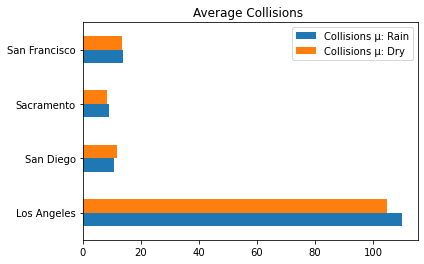

In [35]:
df_bar = pd.DataFrame({'Collisions μ: Rain': rain_means, 'Collisions μ: Dry': dry_means}, index=names)
do_it = df_bar.plot.barh(title='Average Collisions ')

The following box plots display the standard ranges and median values of crash totals on dry and rainy days. We hope to see that the crash totals for rainy days skew higher than on dry days.

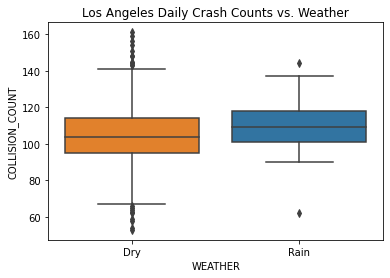

In [36]:
plt.title('Los Angeles Daily Crash Counts vs. Weather')
plt.ylabel('Daily Crash Total')
plt.xlabel('Weather Conditions')
labox = sns.boxplot(x = 'WEATHER', y = 'COLLISION_COUNT', data = ladf, palette = ['tab:orange', 'tab:blue'])
labox = plt.gcf()

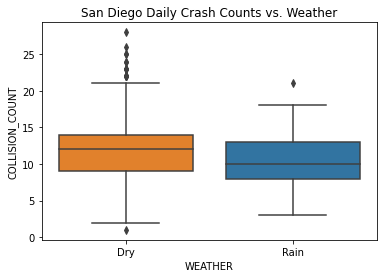

In [37]:
plt.title('San Diego Daily Crash Counts vs. Weather')
plt.ylabel('Daily Crash Total')
plt.xlabel('Weather Conditions')
sdbox = sns.boxplot(x = 'WEATHER', y = 'COLLISION_COUNT', data = sddf, palette = ['tab:orange', 'tab:blue'])
sdbox = plt.gcf()

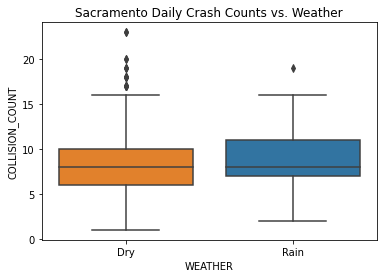

In [38]:
plt.title('Sacramento Daily Crash Counts vs. Weather')
plt.ylabel('Daily Crash Total')
plt.xlabel('Weather Conditions')
scbox = sns.boxplot(x = 'WEATHER', y = 'COLLISION_COUNT', data = scdf, palette = ['tab:orange', 'tab:blue'])
scbox = plt.gcf()

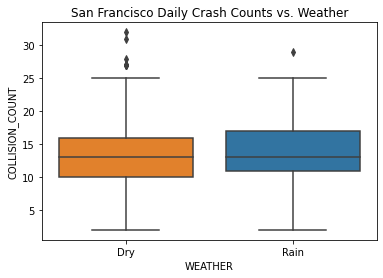

In [39]:
plt.title('San Francisco Daily Crash Counts vs. Weather')
plt.ylabel('Daily Crash Total')
plt.xlabel('Weather Conditions')
sfbox = sns.boxplot(x = 'WEATHER', y = 'COLLISION_COUNT', data = sfdf, palette = ['tab:orange', 'tab:blue'])
sfbox = plt.gcf()

What do we see here? The ratios show that all cities *besides* San Diego have crashes occurring more often on their rainy days than dry since the ratios provided numbers over 1.00. Only San Diego has a higher average amount of dry crashes, thus causing a fraction smaller than 1. The box plot for San Diego corroborates this assertion, as the median daily crash total is lower for rainy days.

It was expected that every city would have more collisions on rainy days, and the goal was to prove that Los Angeles and San Diego would have far higher ratios. We have proven this for LA, but unfortunately not San Diego. Why is this?

The group considered that since San Diego is a beach city, the forecast is changing all the time (more often than San Francisco). There are multiple shifts in forecast within a 24hr period. This means that there could be a very slight amount of rain in the middle of the day, but nice and sunny for the rest. However, that day could still be labeled as a 'Rain' day in our dataset. Even though it had rained for a short amount of time, it does not mean there would be a significant increase in crashes since most of the day was 'Dry'. So could we take yet another different approach to prove that LA and SD crash more in the rain?

**Plan D - Total Annual Precipitation vs Total Annual Collisions**

After brainstorming and careful consideration, the group decided that we could bring the precipitation data to great use. We will take the total amount of crashes (dry + rain) for each of the 5 years, and then the total amount of inches rained in that year. With this data for each city, we should then expect to see that the amount of crashes on a year with more precipitation would be higher than a year with less inches. 

Ultimately, we should see that the Northern cities handled the years with more rain better than the Southern cities!

In [40]:
def annualTotalsDF(df):
    df2015 = df[df['DATE'].dt.year == 2015]
    df2016 = df[df['DATE'].dt.year == 2016]
    df2017 = df[df['DATE'].dt.year == 2017]
    df2018 = df[df['DATE'].dt.year == 2018]
    df2019 = df[df['DATE'].dt.year == 2019]
    rainTotal2015 = df2015['PRCP_in'].sum()
    rainTotal2016 = df2016['PRCP_in'].sum()
    rainTotal2017 = df2017['PRCP_in'].sum()
    rainTotal2018 = df2018['PRCP_in'].sum()
    rainTotal2019 = df2019['PRCP_in'].sum()
    crashTotal2015 = df2015['COLLISION_COUNT'].sum()
    crashTotal2016 = df2016['COLLISION_COUNT'].sum()
    crashTotal2017 = df2017['COLLISION_COUNT'].sum()
    crashTotal2018 = df2018['COLLISION_COUNT'].sum()
    crashTotal2019 = df2019['COLLISION_COUNT'].sum()
    
    data = {'PRCPtotal': [rainTotal2015, rainTotal2016, rainTotal2017, rainTotal2018, rainTotal2019],
            'CrashTotal': [crashTotal2015, crashTotal2016, crashTotal2017, crashTotal2018, crashTotal2019]} 

    annualTotals = pd.DataFrame(data, index =['2015', '2016', '2017', '2018', '2019'])
    return annualTotals

In [41]:
laAnnualTotals = annualTotalsDF(ladf)
sdAnnualTotals = annualTotalsDF(sddf)
scAnnualTotals = annualTotalsDF(scdf)
sfAnnualTotals = annualTotalsDF(sfdf)

We will now display the annual totals for each city, as well as the line graphs showing the totals' trends over time.
By using line graphs, we should see a causation correlation between percipitation and crashes displayed through the patterns of the lines. If the crash trend has a similar pattern to the percipitation trend, then we could theoretically (not directly) conclude that more precipitation causes more crashes.

## Los Angeles

In [42]:
laAnnualTotals

,PRCPtotal,CrashTotal
2015,7.66,36560
2016,11.80,38374
2017,13.24,39125
2018,8.86,38466
2019,21.55,37733


numpy.ndarray

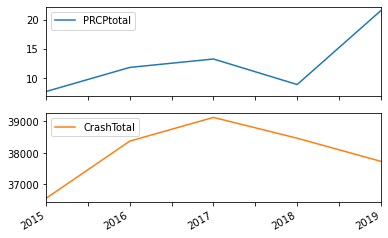

In [43]:
axes = laAnnualTotals.plot.line(subplots=True)
type(axes)

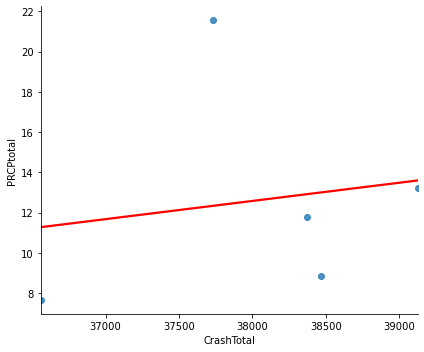

In [44]:
palette = sns.color_palette("RdPu", 10)
sns.lmplot(x='CrashTotal', y='PRCPtotal', data=laAnnualTotals, ci=None, aspect=1.2, line_kws={'color': 'red'});

## San Diego

In [45]:
sdAnnualTotals

,PRCPtotal,CrashTotal
2015,9.01,4417
2016,10.22,4436
2017,7.92,4148
2018,7.65,4198
2019,14.55,4062


numpy.ndarray

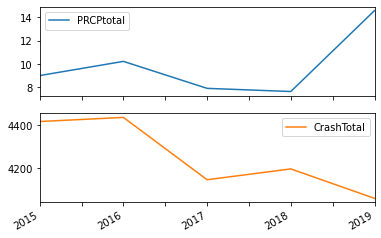

In [46]:
axes = sdAnnualTotals.plot.line(subplots=True)
type(axes)

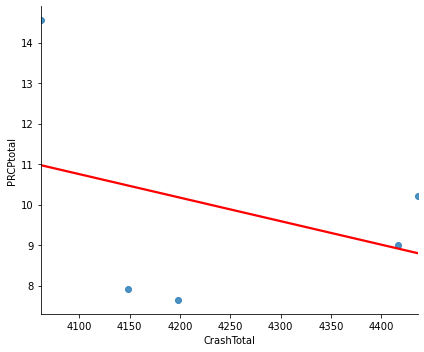

In [47]:
sns.lmplot(x='CrashTotal', y='PRCPtotal', data=sdAnnualTotals, ci=None, aspect=1.2, line_kws={'color': 'red'});

## Sacramento

In [48]:
scAnnualTotals

,PRCPtotal,CrashTotal
2015,8.51,2724
2016,21.55,3107
2017,26.05,2837
2018,17.90,2995
2019,24.88,3410


numpy.ndarray

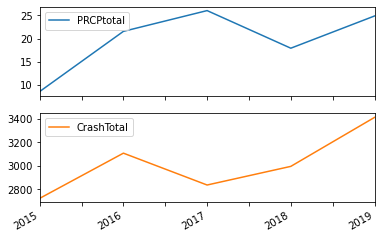

In [49]:
axes = scAnnualTotals.plot.line(subplots=True)
type(axes)

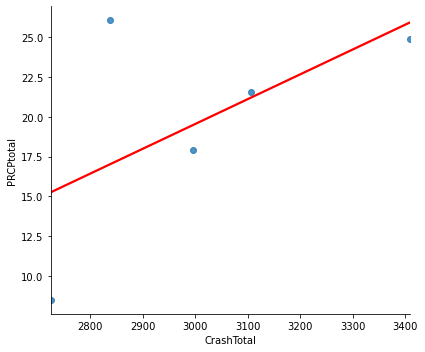

In [50]:
sns.lmplot(x='CrashTotal', y='PRCPtotal', data=scAnnualTotals, ci=None, aspect=1.2, line_kws={'color': 'red'});

## San Francisco

In [51]:
sfAnnualTotals

,PRCPtotal,CrashTotal
2015,9.91,4608
2016,24.83,5116
2017,26.24,4940
2018,19.87,4642
2019,25.72,4820


numpy.ndarray

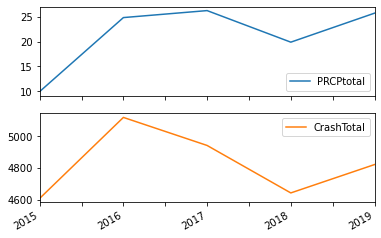

In [52]:
axes = sfAnnualTotals.plot.line(subplots=True)
type(axes)

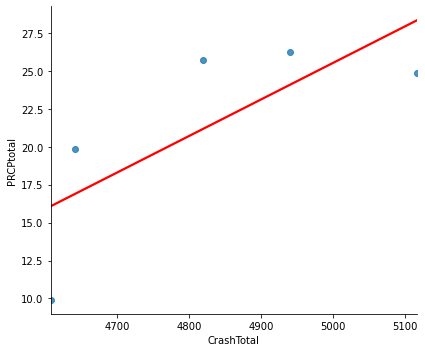

In [53]:
sns.lmplot(x='CrashTotal', y='PRCPtotal', data=sfAnnualTotals, ci=None, aspect=1.2, line_kws={'color': 'red'});

As we can see by the line graphs, San Francisco and Sacramento's crash trends reflect a similar pattern to the precipitation trends. For example, both of SF's trends increase during 2016, dip in 2018, and then rise again in 2019.

The scatterplots for the Northern cities show a correlation between the two quantative variables. The positive relationship in their linear regression is clear to see. As precipitation increases, so do the amount of crashes.

However, our hypothesis was yet again disproved by San Diego's data. In 2016, we barely saw an increase in crashes when there was over an inch more in rain than the previous year. 2019 then showed the complete *opposite* of our expectation. When the precipitation **doubled**, we see the crash total *dips*. Although this is just one year of data, the other 4 years do little to support our hypothesis as well. We ultimately see that the scatterplot gives a negative linear relationship. As the amount of precipitation increases, the crashes decrease.

Los Angeles showed a similar pattern in trends, all up until 2019 as well. 2019 provided over 24 inches in rain and yet the amount of collisions decreased. The scatterplot shows a very small slope in the positive linear regression.

Our group decided that in 2019, many people in Southern California were either able to avoid driving due to the increase of storms, or, as we had hoped for the contrary, that **Southern Californians may actually drive better in the rain than Northern Californians.**

## Predictor to Outcome

We can finalize our EDA by checking if precipitation was a valid predictor to the amount of crashes.

In [54]:
# Los Angeles
outcome, predictors = patsy.dmatrices('COLLISION_COUNT ~ PRCP_in ', ladf)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        COLLISION_COUNT   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.999
Date:                Wed, 17 Mar 2021   Prob (F-statistic):             0.0144
Time:                        23:36:51   Log-Likelihood:                -7395.4
No. Observations:                1816   AIC:                         1.479e+04
Df Residuals:                    1814   BIC:                         1.481e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.6161      0.339    308.462      0.0

In [55]:
# San Diego
outcome, predictors = patsy.dmatrices('COLLISION_COUNT ~ PRCP_in ', sddf)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        COLLISION_COUNT   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.679
Date:                Wed, 17 Mar 2021   Prob (F-statistic):             0.0173
Time:                        23:36:51   Log-Likelihood:                -4954.2
No. Observations:                1787   AIC:                             9912.
Df Residuals:                    1785   BIC:                             9923.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9376      0.093    128.174      0.0

In [56]:
# Sacramento
outcome, predictors = patsy.dmatrices('COLLISION_COUNT ~ PRCP_in ', scdf)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        COLLISION_COUNT   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.204
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.273
Time:                        23:36:51   Log-Likelihood:                -4658.2
No. Observations:                1801   AIC:                             9320.
Df Residuals:                    1799   BIC:                             9331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3478      0.078    106.690      0.0

In [57]:
# San Francisco
outcome, predictors = patsy.dmatrices('COLLISION_COUNT ~ PRCP_in ', sfdf)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        COLLISION_COUNT   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6308
Date:                Wed, 17 Mar 2021   Prob (F-statistic):              0.427
Time:                        23:36:51   Log-Likelihood:                -5112.0
No. Observations:                1778   AIC:                         1.023e+04
Df Residuals:                    1776   BIC:                         1.024e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.5467      0.106    128.233      0.0

We see that all of the p-values are greater than 0.01. Los Angeles and San Diego are very close to this alpha value, in which we could still consider rain to be a reasonable predictor in crashes. However, Sacramento and San Francisco are significantly off. We then failed to reject the null hypothesis for these Northern Cities. This means that the linear regression showing the Southern cities could be better trusted than the Northern cities. 

This serves as the third and official analysis in which we are unable to prove that Southern Californian drivers drive worse in the rain than Northern Californians.

____________________________________________________________________________________________
In the end, the group agreed that data containing the amount of cars on the road during a given day would have come to great use. However, this data was difficult to collect due to it being divided upon specific streets and freeways, and did not contain specific dates. 

We also agreed that we could have collected more annual datasets as 2019 made up 1/5th of our data, causing a great contrast in our overall findings.

# Ethics & Privacy

   Because we are using publicly sourced data sets with no personally identifiable information, we do not anticipate any privacy concerns with obtaining or utilizing the datasets necessary for our project. From an ethics standpoint, NWS data for each city should not have any bias issues as collection of weather data does not significantly involve individuals and communities within these cities. Data sourced from SWITRS is dependent on the accuracy of the reporting by police officers, and as a result may be influenced by human error. It should be noted that all of the cities studied in this project have had publicized issues with over-policing in predominantly Black, Latino, and low-income areas, and these areas may be overrepresented in officially reported crime statistics. However, because our dataset will only be using daily totals of recorded car accidents for each city as a whole, we do not believe that this potential bias invalidates the data we are working with. We unfortunately do not have a concrete method of determining subtle bias in our data at this time due to both the scope of the project and the lack of open public data on the information we would need to assess implicit bias in SWITRS data.
   
   Because similar studies have been done on the subject of regional bad driving, we do not predict any unique negative impacts as a result of our project. While our conclusions could potentially be used to justify negative stereotypes of drivers in certain cities, our project is unlikely to gain enough exposure to do this to a significant degree. We hope that our findings will instead be used for good to inform infrastructure improvements such as better road visibility in cities with high rates of collisions during inclement weather.

# Conclusion & Discussion

While brainstorming ideas for this project, one of the teammates had brought up their frustration with drivers in San Diego when it’s raining. Since they were from Northern California, they suggested that Northern California drivers handle the rain far better than Southern Californians. This idea then became the idea for our implementation. We hypothesized that drivers in Southern California are prone to vehicle collisions than drivers in Northern California because it rains more often in the Northern areas than the south. These cities we decided to study were Los Angeles, San Diego, Sacramento, and San Francisco.

After pulling collision and weather datasets, cleaning and wrangling the data, and having generated visuals, we came to the first roadblock in our analysis. The results showed that there was a much higher frequency of crashes occurring on non-rainy days, which seemed counterintuitive; however, we realized we hadn’t taken into account that there are far less drivers on the road when it is raining.

As the Average Annual Daily Traffic datasets were too difficult to pull, we attempted to overcome this obstacle by comparing the average crashes on rainy days vs non-rainy days. We did this by taking the aggregate sum of all crashes of the rainy and non-rainy days and dividing this by the total number of rainy and non-rainy days respectively. Doing this gave us an average crashes-per-day statistic of the rainy and non-rainy days. These results showed us that there were more average crashes per rainy day in Los Angeles, Sacramento, and San Francisco, but not San Diego. Our group considered that this discrepancy in the San Diego data may be attributed to the fact that the San Diego weather forecast is ever-changing. There might have been rain forecasted on certain days where it only rained a small amount and the rest of the day was clear. This could lead those days in our data to be labeled as rainy days where in reality, most of the day was dry, thus causing no problems to drivers.

We again attempted to pursue further analysis by looking at the precipitation totals and comparing it to the total number of crashes for any year in any given city. These results showed a positive correlation between the precipitation and crashes for the Northern California cities, but not for San Diego. San Diego had a clear negative relationship between total rain and number of crashes. The total rain almost doubled from 2018 to 2019 and the number of crashes *decreased* during this time.

We were ultimately unable to prove our hypothesis correct through our analysis. In turn, our group decided that Southern Californians may in fact drive better in rainy weather than their Northern Californian counterparts.

**Moving Forward**

In the future, if we were to continue this project to create a more robust and thorough analysis, our group would try and include more annual datasets as our dataset for 2019 comprised about 20% of our total data. In addition to this, we would try and find datasets that give us information regarding how many cars are on the road on any given day in these cities. The AADT datasets we looked at didn’t contain any dates in regard to the amount of cars on the streets and highways listed. Having this information would allow us to carry out a much more accurate analysis regarding the average amount of crashes per day in any given city.

# Team Contributions

Aditya Ashar: Background, Hypothesis, Conclusion, Video Script/Presentation, Finalized Project

Alanna Merlan: Background, Hypothesis, Dataset selection, Data Cleaning, EDA, Data Visualization, Finalized Project

Andy Sunjic: Background, Hypothesis, Data Cleaning, EDA, Data Visualization, Finalized Project

Emma Thomsen: Background, Hypothesis, Dataset selection/aggregation, Ethics/Privacy, Video Script/Presentation, Finalized Project

Sujay Srinivasan: Overview,  Background, Hypothesis, Video Script/Presentation, Finalized Project